### **Heaps**

A Heap is a complete binary tree data structure that satisfies the heap property: for every node, the value of its children is greater than or equal to its own value. Heaps are usually used to implement priority queues, where the smallest (or largest) element is always at the root of the tree.

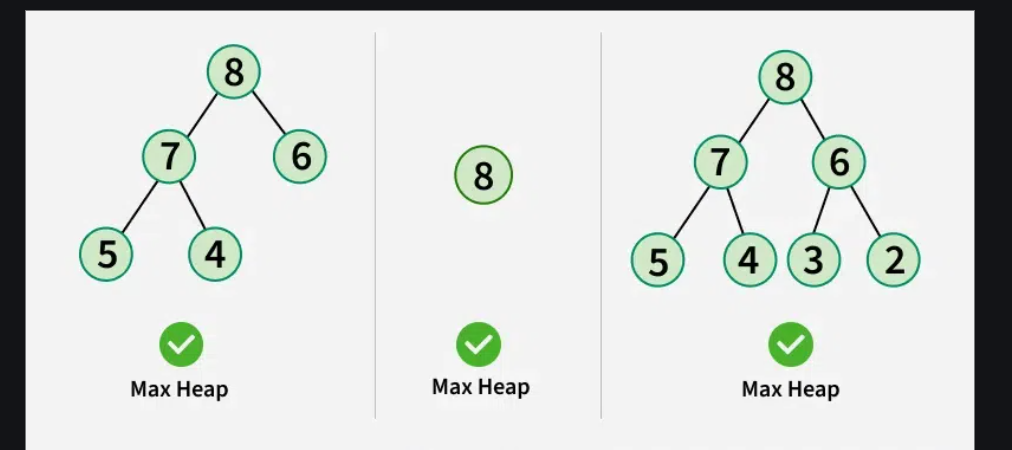

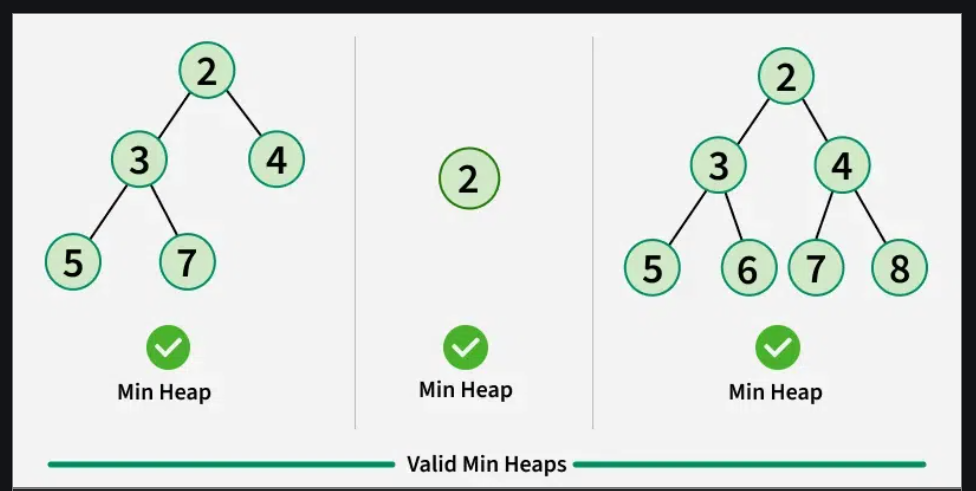

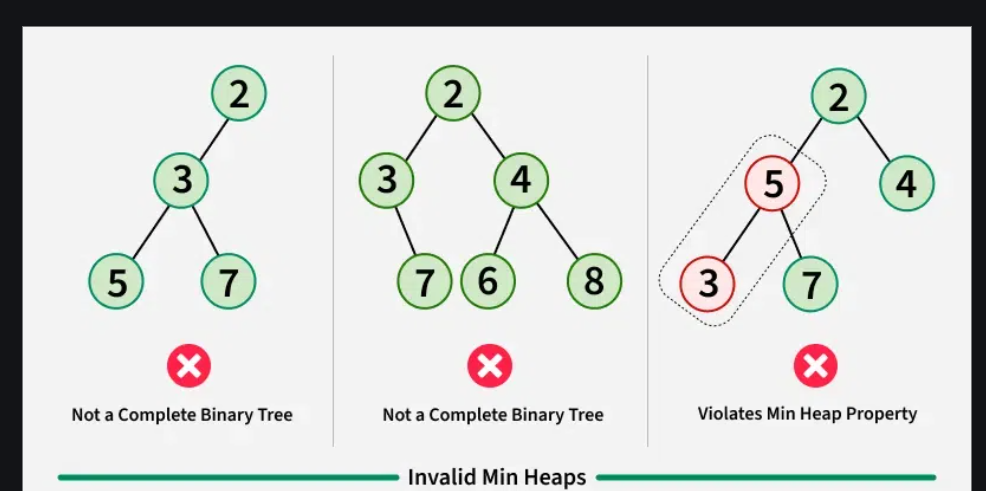

we can represent the binary tree (representing a heap) as an array, in general  for any parent in the heap, at position i in our array it two children will , if they exists, will be at positions 2i + 1 and 2i + 2 (left and right child respectively).


When we convert an array to a heap we can simply call `heapq.heapify(arr)`. In Python heaps are min heap by default and this means the element at the root of the binary tree representation of the heap is the minimum element. To get this element. we can see or peak the element by doing `heap[0]` and we can remove it for use by doing `heappop()`. 

heap[0] is O(1)

heappop() is O(log N)

we also have `heappush` to insert an element in a heap.... bare in mind a heap goes to it position in the binary tree representation of the heap not the root element, unless it is the minimum value.

Images are from GeeksforGeeks

In [2]:
from heapq import *

In [3]:
# build a MIN heap

A = [-4, 3, 1, 0, 2, 5, 10, 8, 12, 9]

heapify(A)

A # an array representing the binary tree

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]

In [4]:
# heap pop 
# O(log N) TC

min_el = heappop(A)

A, min_el

([0, 2, 1, 3, 9, 5, 10, 8, 12], -4)

In [5]:
# heapsort # using the heapq functions in O(N)

def heapsort(arr):
    heapify(arr)
    n = len(arr)
    new_list = [0]*n

    for i in range(n):
        min_el = heappop(arr)
        new_list[i] = min_el

    return new_list

heapsort([-4, 2 , 0, 5, 7, -1])

[-4, -1, 0, 2, 5, 7]

Python does support max heap by default so we can create a max heap by negating the values and when we want to get the valu we simply negate it again to get the original value.

In [6]:
A = [-4, 3, 1, 0, 2, 5, 10, 8, 12, 9]

A = [-x for x in A]

heapify(A) 
print([-x for x in A]) # now a max heap 

[12, 9, 10, 8, 2, 5, 1, 3, 0, -4]


In [7]:
# say I need to add 14 to the heap instead of adding 14 i'll add -14 since i am using a max heap
heappush(A, -14)

A

[-14, -12, -10, -8, -9, -5, -1, -3, 0, 4, -2]

In [12]:
# putting tuples of elements in a heap

D = [5, 4, 3, 5, 4, 3, 5, 5, 4]
My_heap = []
from collections import Counter

count_dict = Counter(D)

for k, v in count_dict.items():
    heappush(My_heap, (f"frequency: {v}", k)) # sort by frequencey

for i in range(len(My_heap)):
    print(heappop(My_heap))

('frequency: 2', 3)
('frequency: 3', 4)
('frequency: 4', 5)


#### **1. Kth largest element in a stream**

kth largest doesn't mean only consider unique element in this question. If i have 1, 2, 2, 3 the third largest is 2.

It's possible to do this using an array data structure but to kind the kth largest element would be O(N), if the array was sorted we could use a binary search and that would be O(log N), but in this case we can add an element to the stream, and it would be dificult to have the array sorted, unless we sort it which will result in an O(Nlog N) overhead. So in that case we would have to use a priority queue data structure (heap) to efficiently push in element in their right possition an query the top k element. But we can efficiently do this by using a heap that maintains on the top k largest value (we will leave the heap as size a) and when we add a new value into the heap and the size goes beyond k to k + 1 we simply pop an element (the least.), we will use a min heap because we need the k largest... we can inlcude the fist 3 numbers we get and when a smaller number is added we pop if we keep doing this we have a heap that maintains the current k-largest elements in the heap. and the 3rd largest will be the minimum in the min heap.

In [13]:
import heapq
class KthLargest:
    def __init__(self, nums, k):
        self.minheap, self.k = nums, k
        heapq.heapify(self.minheap)
        # incase array was initialized with over k elements
        while len(self.minheap) > k:
            heapq.heappop(self.minheap)
    def add(self, val):
        heapq.heappush(self.minheap, val)
        # pop if length of heap is greater than k after pushing
        if len(self.minheap) > k:
            heapq.heappop(self.minheap)
        return self.minheap[0]        

#### **2. Last stone weight**

we are given a collection of stones. each stone has a weight